<a href="https://colab.research.google.com/github/EdH66/VAME_Repurposing/blob/master/VAMEtest_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Connect google drive to google colab

1.   Connect colab notebook to google drive






In [66]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Fri Jan 12 13:15:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import some packages ...
import pip
import jupyter
import torchvision
!pip install --upgrade setuptools

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
# Install more packages ...
!pip install pytest-shutil
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pathlib
!pip install pandas
!pip install ruamel.yaml
!pip install sklearn
!pip install pyyaml
!pip install opencv-python-headless
!pip install h5py
!pip install umap
!pip install umap-learn
!pip install networkx
!pip install tqdm

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
!pip install hmmlearn
!pip install scikit-learn


In [6]:
# check pip installed packages
!pip list -v

Package                          Version               Location                                Installer
-------------------------------- --------------------- --------------------------------------- ---------
absl-py                          1.4.0                 /usr/local/lib/python3.10/dist-packages pip
aiohttp                          3.9.1                 /usr/local/lib/python3.10/dist-packages pip
aiosignal                        1.3.1                 /usr/local/lib/python3.10/dist-packages pip
alabaster                        0.7.13                /usr/local/lib/python3.10/dist-packages pip
albumentations                   1.3.1                 /usr/local/lib/python3.10/dist-packages pip
altair                           4.2.2                 /usr/local/lib/python3.10/dist-packages pip
anyio                            3.7.1                 /usr/local/lib/python3.10/dist-packages pip
appdirs                          1.4.4                 /usr/local/lib/python3.10/dist-packages pi

In [7]:
# Download VAME
!git clone https://github.com/LINCellularNeuroscience/VAME.git

fatal: destination path 'VAME' already exists and is not an empty directory.


In [67]:
%cd /content/VAME
!python setup.py install

/content/VAME
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for detail

In [10]:
import vame

Using CUDA
GPU active: True
GPU used: Tesla T4


# Project Setup

In [11]:
project = 'VAME_Example_120224'
working_directory = '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example'
videos = '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/video-1.mp4'

In [12]:
config = vame.init_new_project(project=project, videos=videos, working_directory=working_directory, videotype='.mp4') # Creates all folders


Created "/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos"
Created "/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/data"
Created "/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/results"
Created "/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/model"
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
No videos found in /
Perhaps change the videotype, which is currently set to: .mp4
N

In [64]:
config = '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/config.yaml' # link to old project

# Prepare the data for analysis on google drive

1. Move pose.csv file generated by deeplabcut into pose_estimation folder
2. Set the video path in the config file (to video csv in pose estimation)
e.g video_sets: [/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/video-1.csv]




In [68]:
vame.egocentric_alignment(config, pose_ref_index=[0,5], crop_size=(300,300), use_video=False, video_format='.mp4', check_video=False) # transform for egocentric aligment


Aligning data /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/video-1.csv, Pose confidence value: 0.99


AssertionError: Multiple data files match video /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/video-1.csv

In [ ]:
#vame.csv_to_numpy(config, datapath='\\content\\drive\\MyDrive\\Colab Notebooks\\VAME\\VAME_Example\\VAME_Example_120224-Jan12-2024\\videos\\pose_estimation') # If data is already in egocentric aligment or you want it to be ignored

In [49]:
vame.create_trainset(config)

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
Creating trainset from the vame.csv_to_numpy() output 
z-scoring of file /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/-PE-seq.npy'

#Begin model training using colab GPU

###Train the model for the first time until convergence (Epoch max default 500).

1.   Run vame.trainmodel()

*NB (1 video 256 epochs, max 500)*

####Update config and re-run / continue training from previous model.

1.   First, set _pretrained_weights_ in your config.yaml to "true"
2.   Also, plug your current model name into _pretrained_model_.
3.   Set "model_convergence" in your config.yaml to a higher value.
4.   re-run vame.trainmodel()
5.   re-run vame.evaluatemodel()



In [44]:
vame.train_model(config)

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  Tesla T4
Latent Dimensions: 30, Time window: 30, Batch Size: 256, Beta: 1, lr: 0.0005

Compute mean and std for temporal dataset.
Initialize train data. Datapoints 26998
Initialize test data. Datapoints 2999
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1
Train loss: 23119.289, MSE-Loss: 14724.065, MSE-Future-Loss 8395.224, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 1962.120, MSE-Loss: 1962.120, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 10383.447, MSE-Loss: 6287.989, MSE-Future-Loss 4095.458, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 1810.251, MSE-Loss: 1810.251, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 8709.887, MSE-Loss: 5152.308, MSE-Future-Loss 3556.100, KL-Loss: 1.072, Kmeans-Loss: 0.408, weight: 0.25
Test loss: 1661.339, MSE-Loss: 1659.648, KL-Loss: 1.323, Kmeans-Loss: 0.368


Epoch: 4
Train loss

Evaluation and plotting of model

Using CUDA
GPU active: True
GPU used: Tesla T4


Evaluation of VAME model. 

Initialize test data. Datapoints 2999
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.pose_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


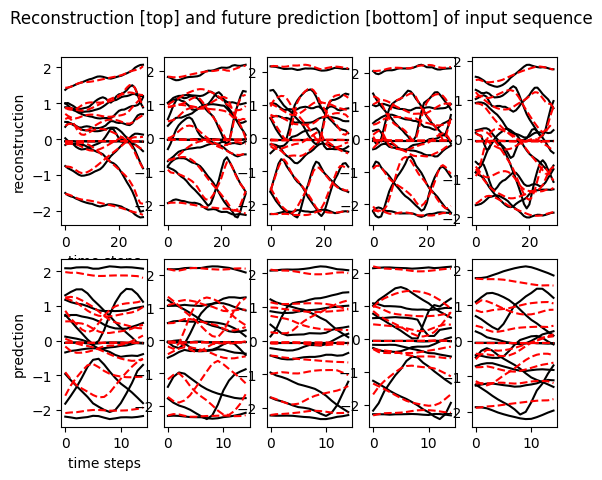

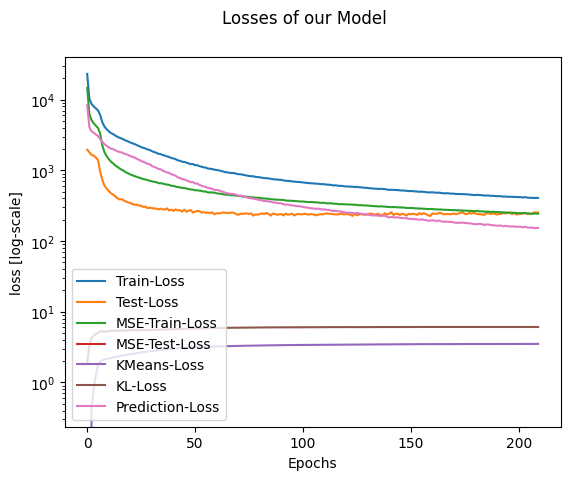

In [54]:
vame.evaluate_model(config)

#Run Pose_segmentation

NB Works when config file is as below as looks for new folder caled VAME inside pose_estimation.
Video folder contains
-PE-seq-clean.npy
-.csv  
-.mp4

*project_path: /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/
VAME_Example_120224-Jan12-2024

*video_sets: [/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/]

*n_cluster: 30 (how many k-Means states should be clustered)

*individual_parameterization: False (If True, every animal gets their own parameterization/clustering via k-Means)

In [58]:
vame.pose_segmentation(config)

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: Tesla T4
Embedding of latent vector for file /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/


100%|██████████| 29967/29967 [00:54<00:00, 547.97it/s]


For all animals the same parameterization of latent vectors is applied for 15 cluster
Using a HMM as parameterization!
/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/VAME/hmm-15/


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/VAME/hmm-15/15_km_label_/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/.npy'

In [ ]:
vame.motif_videos(config, videoType='.mp4')

In [ ]:
vame.community(config, show_umap=False, cut_tree=2)

In [ ]:
vame.community_videos(config)

In [ ]:
vame.visualization(config, label=None) #options: label: None, "motif", "community"

In [ ]:
# Note: This function is currently very slow. Once the frames are saved you can create a video
# or gif via e.g. ImageJ or other tools
vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
         length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))

In [ ]:
vame.generative_model(config, mode="centers") #options: mode: "sampling", "reconstruction", "centers", "motifs"